In [2]:
from pyspark.sql import SparkSession

In [4]:
spark = SparkSession.Builder().appName("Analysis").master("local[12]").getOrCreate()

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/10/08 10:30:45 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/10/08 10:30:45 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [5]:
df = spark.read.parquet("../test_data.parquet")
df.show()

+--------------------+--------+------------------+-------------+--------------------+----+------------------+------------+--------------+
|                  Id|Notional|     Interest Rate|Interest Type|          Start Date|Term|Remaining Notional|Payment Type|Risk Indicator|
+--------------------+--------+------------------+-------------+--------------------+----+------------------+------------+--------------+
|14bc18bc-cb2d-458...|  285541|2.1354823813795885|        Var20|2019-01-19 15:35:...|  25|          285541.0|      Bullet|             0|
|8a597a5a-a5c7-4d6...|  763934| 3.446673585526765|        Fixed|2019-12-23 15:35:...|  20|   677580.34519278|     Annuity|             0|
|f4a94578-fa0c-45d...|  451062| 2.796471879064252|        Fixed|2016-05-20 15:35:...|  20|          300708.0|      Linear|             0|
|a0800f88-8ad8-412...|  488105|6.2589826253577705|        Var20|2016-09-14 15:35:...|  30|          488105.0|      Bullet|             4|
|5c1a3215-ce68-4f8...|  710372|2.7

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import matplotlib as mpl
from pyspark.sql import functions as fn

+-------------+------------------+--------------------+
|Interest Type|avg(Interest Rate)|count(Interest type)|
+-------------+------------------+--------------------+
|        Fixed|3.2095959652618125|              190833|
|        Var10|1.7110985263740375|              142796|
|        Var15|2.2092415881310643|              143129|
|        Var20|2.7119628739260033|               95268|
|         Var5|1.2126884175857608|              142682|
|         Var7|1.3121066228007174|              142879|
|         Var9|1.6105414196773031|              142412|
+-------------+------------------+--------------------+



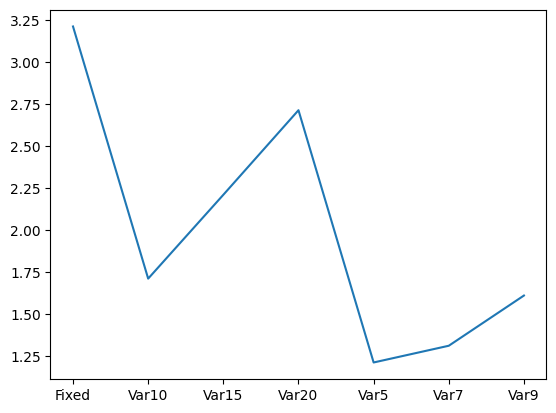

In [36]:
fig, ax = plt.subplots()
rateAvg = df.groupBy('Interest Type').agg(fn.mean('Interest Rate'), fn.count('Interest type')).orderBy('Interest Type')

types = [x['Interest Type'] for x in rateAvg.select('Interest Type').collect()]
rates = [x['avg(Interest Rate)'] for x in rateAvg.select("avg(Interest Rate)").collect()]

ax.plot(types, rates)
rateAvg.show()

+--------------+------------------+---------------------+
|Risk Indicator|avg(Interest Rate)|count(Risk Indicator)|
+--------------+------------------+---------------------+
|             0|1.8102336317371042|               800397|
|             1|2.1122224670762075|               100240|
|             2|2.9157605210983055|                49565|
|             3|3.7016878951419745|                29987|
|             4|  5.30587847485098|                19810|
+--------------+------------------+---------------------+



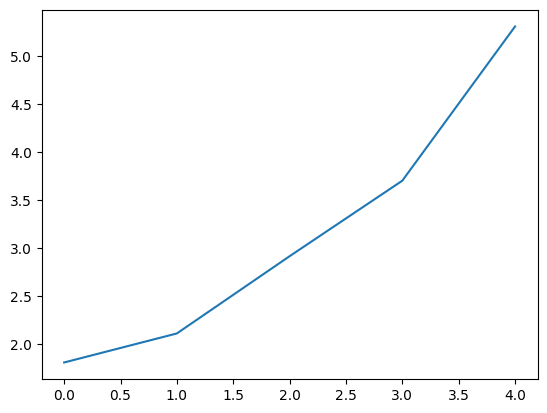

In [35]:
fig, ax = plt.subplots()
riskAvg = df.groupBy('Risk Indicator').agg(fn.mean('Interest Rate'), fn.count('Risk Indicator')).orderBy('Risk Indicator')

types = [x['Risk Indicator'] for x in riskAvg.select('Risk Indicator').collect()]
rates = [x['avg(Interest Rate)'] for x in riskAvg.select("avg(Interest Rate)").collect()]

ax.plot(types, rates)
riskAvg.show()